<a href="https://colab.research.google.com/github/songpont/report/blob/master/workshop_14Dec2023_seaborn_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
# Specify the path to your file
file_path = '/content/drive/MyDrive/PM_esan/Fire_Source_2012-2023Nov/03_Yearly_ADM_LU/combined_data.csv' # Change 'your_file.csv' to your file's name

# Read the file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

Mounted at /content/drive


<ipython-input-2-38176b3d6473>:9: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,...,frp,daynight,Year,TAM_NAM_T,AMPHOE_T,AMPHOE_E,PROV_NAM_T,PROV_NAM_E,LUL1_CODE,LUL2_CODE
0,16.04633,104.05120,312.16,0.42,0.38,2023/02/28,1849,N,VIIRS,n,...,1.25,N,2023,ต.ภูเงิน,อ.เสลภูมิ,Amphoe Sela Phum,ร้อยเอ็ด,Roi Et,A,A2
1,16.01995,104.05153,302.58,0.66,0.73,2023/03/03,1934,N,VIIRS,n,...,1.42,N,2023,ต.ภูเงิน,อ.เสลภูมิ,Amphoe Sela Phum,ร้อยเอ็ด,Roi Et,M,M1
2,16.05333,104.08307,348.88,0.43,0.38,2023/03/10,631,N,VIIRS,n,...,4.51,D,2023,ต.ภูเงิน,อ.เสลภูมิ,Amphoe Sela Phum,ร้อยเอ็ด,Roi Et,A,A2
3,16.02009,104.09893,336.05,0.34,0.56,2023/03/30,657,N,VIIRS,n,...,3.07,D,2023,ต.ภูเงิน,อ.เสลภูมิ,Amphoe Sela Phum,ร้อยเอ็ด,Roi Et,A,A1
4,16.02532,104.09833,356.00,0.34,0.56,2023/03/30,657,N,VIIRS,n,...,3.07,D,2023,ต.ภูเงิน,อ.เสลภูมิ,Amphoe Sela Phum,ร้อยเอ็ด,Roi Et,A,A3


# โจทย์
1. จำนวนจุดความร้อนสะสม 13 ปี แยกให้เห็น Land use Lv1  
2. จำนวนจุดความร้อน 20 จังหวัด แสดงผลรายปี   



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print (df.columns)

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'Year', 'TAM_NAM_T', 'AMPHOE_T',
       'AMPHOE_E', 'PROV_NAM_T', 'PROV_NAM_E', 'LUL1_CODE', 'LUL2_CODE'],
      dtype='object')


In [ ]:
df[['Year','LUL1_CODE']].value_counts()

Year  LUL1_CODE
2013  A            41125
2016  A            39660
2015  A            36900
2019  A            36405
2014  A            30748
                   ...  
2017  M+A            236
2018  M+A            198
2012  M+A            192
2023  M+A            181
2022  M+A            157
Length: 72, dtype: int64

In [ ]:
value_counts = df['Year'].value_counts()
# สร้าง dataframe ใหม่ ชื่อ df_year โดยดึงค่าจาก value_counts โดย สร้าง column Year เก็บค่า Index จาก value_counts และ สร้าง column HotSpot เก็บค่า values (นับว่าในแต่ละปีมีกี่ records) จาก value_counts
df_year = pd.DataFrame({'Year' : value_counts.index, 'HotSpot' : value_counts.values})

In [ ]:
df_year

,Year,HotSpot
0,2016,61869
1,2013,61033
2,2019,56930
3,2015,51020
4,2020,43311
5,2014,43303
6,2018,34832
7,2012,32288
8,2017,32063
9,2023,31683


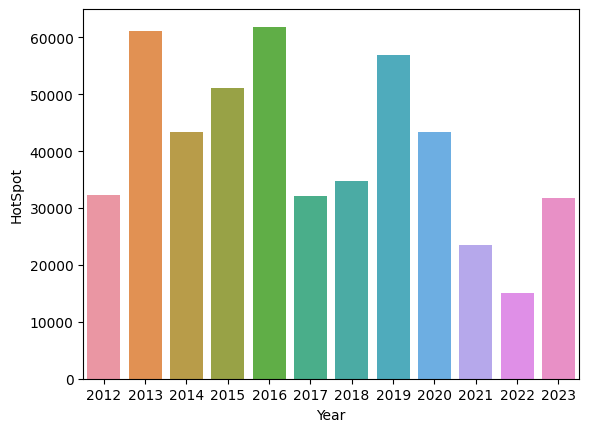

In [ ]:
sns.barplot(x='Year',y='HotSpot', data=df_year)
plt.show()

In [ ]:
# ใช้ groupby เพื่อนับความถี่ของคอลัมน์ที่ต้องการ เราต้องการ size คือขนาด และ reset_index เพื่อกำหนด index ของ dataframe พร้อมทั้งตั้งชื่อคอลัมน์ความถี่ที่นับได้
df_year_landuse = df.groupby(['Year','LUL1_CODE']).size().reset_index(name = 'HotSpot')

In [ ]:
df_year_landuse

,Year,LUL1_CODE,HotSpot
0,2012,A,22928
1,2012,F,7212
2,2012,M,870
3,2012,M+A,192
4,2012,U,517
...,...,...,...
67,2023,F,13307
68,2023,M,1361
69,2023,M+A,181
70,2023,U,520


Text(0.5, 1.0, 'Year HotSpot By Land used')

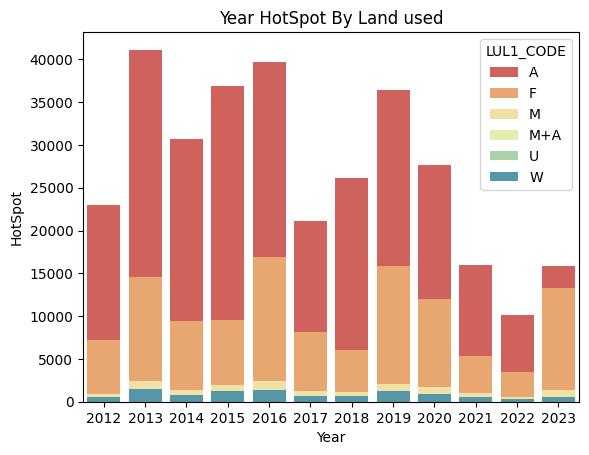

In [ ]:
# create stacked bar chart // hue กำหนดว่าจะเรียง stack แบบไหน False คือแนวตั้ง data คือ ใช้ dataframe ไหน palette คือการระบุโทนสี
# เลือกโทนสี https://seaborn.pydata.org/tutorial/color_palettes.html
sns.barplot(x = 'Year', y = 'HotSpot', hue = 'LUL1_CODE', dodge=False, data=df_year_landuse, palette='Spectral')

# labels for x & y axis
plt.xlabel('Year')
plt.ylabel('HotSpot')

# title of plot
plt.title('Year HotSpot By Land used')

In [ ]:
# Filter the DataFrame for rows where 'LUL1_CODE' is 'A' or 'M+A'
filtered_df = df[df['LUL1_CODE'].isin(['A', 'M+A'])]

# Use value_counts on the 'Year' column of the filtered DataFrame
year_counts = filtered_df['Year'].value_counts()

# Convert the Series to a DataFrame
df_agri = year_counts.reset_index()

# Rename the columns for clarity
df_agri.columns = ['Year', 'Count']

# Display the new DataFrame
print(df_agri)


    Year  Count
0   2013  41676
1   2016  40295
2   2015  37376
3   2019  36887
4   2014  31008
5   2020  28021
6   2018  26305
7   2012  23120
8   2017  21368
9   2021  16167
10  2023  15994
11  2022  10308


Text(0.5, 1.0, 'Year HotSpot By Agriculture Land used')

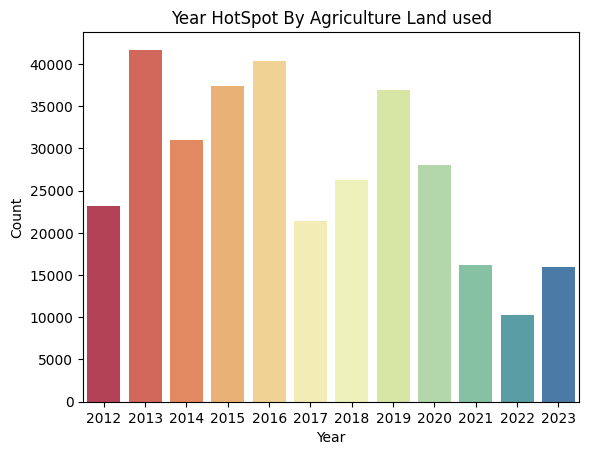

In [ ]:
# create stacked bar chart // hue กำหนดว่าจะเรียง stack แบบไหน False คือแนวตั้ง data คือ ใช้ dataframe ไหน palette คือการระบุโทนสี
# เลือกโทนสี https://seaborn.pydata.org/tutorial/color_palettes.html
sns.barplot(x = 'Year', y = 'Count', dodge=False, data=df_agri, palette='Spectral')

# labels for x & y axis
plt.xlabel('Year')
plt.ylabel('Count')

# title of plot
plt.title('Year HotSpot By Agriculture Land used')

In [ ]:
import pandas as pd

# Assuming 'df' is your original DataFrame

# Create a new column 'LU' for the combination of 'PROV_NAM_E' and 'LUL1_CODE'
df['LU'] = df['PROV_NAM_E'] + '-' + df['LUL1_CODE']

# Group by 'Year' and 'LU', and count the occurrences in each group
hotspot_counts = df.groupby(['Year', 'LU']).size().reset_index(name='Hotspot')

# The resulting DataFrame 'hotspot_counts' has columns: 'Year', 'LU', and 'Hotspot'
print(hotspot_counts)

      Year                 LU  Hotspot
0     2012    Amnaj Charoen-A      293
1     2012    Amnaj Charoen-F       47
2     2012    Amnaj Charoen-M       20
3     2012  Amnaj Charoen-M+A        1
4     2012    Amnaj Charoen-U        1
...    ...                ...      ...
1440  2023         Yasothon-A      443
1441  2023         Yasothon-F       55
1442  2023         Yasothon-M       19
1443  2023         Yasothon-U        4
1444  2023         Yasothon-W        6

[1445 rows x 3 columns]


In [ ]:
hotspot_counts

,Year,LU,Hotspot
0,2012,Amnaj Charoen-A,293
1,2012,Amnaj Charoen-F,47
2,2012,Amnaj Charoen-M,20
3,2012,Amnaj Charoen-M+A,1
4,2012,Amnaj Charoen-U,1
...,...,...,...
1440,2023,Yasothon-A,443
1441,2023,Yasothon-F,55
1442,2023,Yasothon-M,19
1443,2023,Yasothon-U,4


In [ ]:
heatmap_data = hotspot_counts.pivot_table(index ='Year', columns = 'LU', values = 'Hotspot', fill_value=0)

In [ ]:
heatmap_data

LU,Amnaj Charoen-A,Amnaj Charoen-F,Amnaj Charoen-M,Amnaj Charoen-M+A,Amnaj Charoen-U,Amnaj Charoen-W,Bung Kan-A,Bung Kan-F,Bung Kan-M,Bung Kan-M+A,...,Udon Thani-M,Udon Thani-M+A,Udon Thani-U,Udon Thani-W,Yasothon-A,Yasothon-F,Yasothon-M,Yasothon-M+A,Yasothon-U,Yasothon-W
Year,,,,,,,,,,,,,,,,,,,,,
2012,293,47,20,1,1,10,73,17,15,4,...,73,31,41,56,446,34,16,3,7,12
2013,694,231,49,7,10,20,195,249,50,4,...,169,104,93,146,1075,93,87,9,11,46
2014,497,78,22,3,7,4,164,14,42,0,...,107,45,55,54,653,55,33,4,6,24
2015,603,109,29,0,11,16,150,178,29,0,...,112,49,65,84,1108,52,68,9,15,29
2016,532,154,57,10,11,18,174,12,32,2,...,110,62,68,81,991,118,94,8,12,53
2017,187,55,19,3,6,3,146,7,11,1,...,80,28,47,53,511,38,23,2,8,24
2018,324,47,12,0,6,10,145,31,14,1,...,86,38,62,32,693,45,16,1,6,8
2019,456,109,31,3,2,15,170,180,42,1,...,145,66,68,72,846,97,73,2,7,27
2020,341,96,24,2,2,10,188,7,31,2,...,96,42,64,64,539,68,26,4,3,11


<Axes: xlabel='LU', ylabel='Year'>

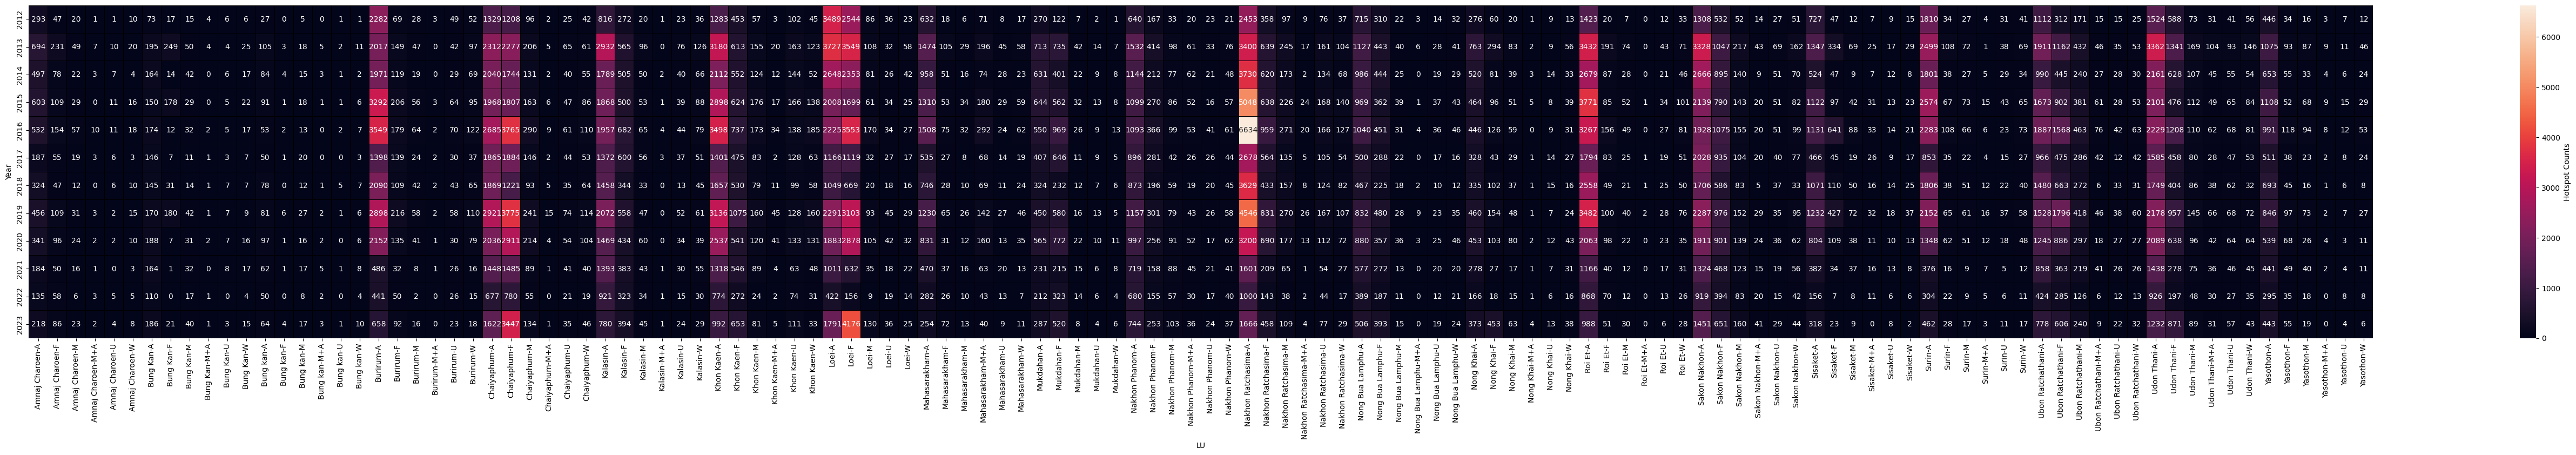

In [ ]:
#plot the heat map
plt.figure(figsize=(70,8))
sns.heatmap (heatmap_data, annot = True, fmt = 'd', linewidths=.5, linecolor='black', cbar_kws = {'label' : 'Hotspot Counts'})

In [ ]:
import pandas as pd

# Assuming 'df' is your original DataFrame

# Convert 'acq_date' to datetime and extract 'month-year'
df['acq_date'] = pd.to_datetime(df['acq_date'])
df['Month'] = df['acq_date'].dt.strftime('%Y-%m')

# Create a new column 'LU' for the combination of 'PROV_NAM_E' and 'LUL1_CODE'
df['LU'] = df['PROV_NAM_E'] + '-' + df['LUL1_CODE']

# Group by 'Month' and 'LU', and count the occurrences in each group
hotspot_counts2 = df.groupby(['Month', 'LU']).size().reset_index(name='Hotspot')

# The resulting DataFrame 'hotspot_counts' has columns: 'Month', 'LU', and 'Hotspot'
print(hotspot_counts2)


        Month                  LU  Hotspot
0     2012-01     Amnaj Charoen-A        2
1     2012-01     Amnaj Charoen-M        1
2     2012-01     Amnaj Charoen-W        1
3     2012-01          Bung Kan-A        6
4     2012-01          Bung kan-A        6
...       ...                 ...      ...
8950  2023-12             Surin-A        3
8951  2023-12             Surin-M        2
8952  2023-12             Surin-U        1
8953  2023-12  Ubon Ratchathani-A       12
8954  2023-12        Udon Thani-A        3

[8955 rows x 3 columns]


In [ ]:
heatmap_data2 = hotspot_counts2.pivot_table(index ='Month', columns = 'LU', values = 'Hotspot', fill_value=0)

<Axes: xlabel='LU', ylabel='Month'>

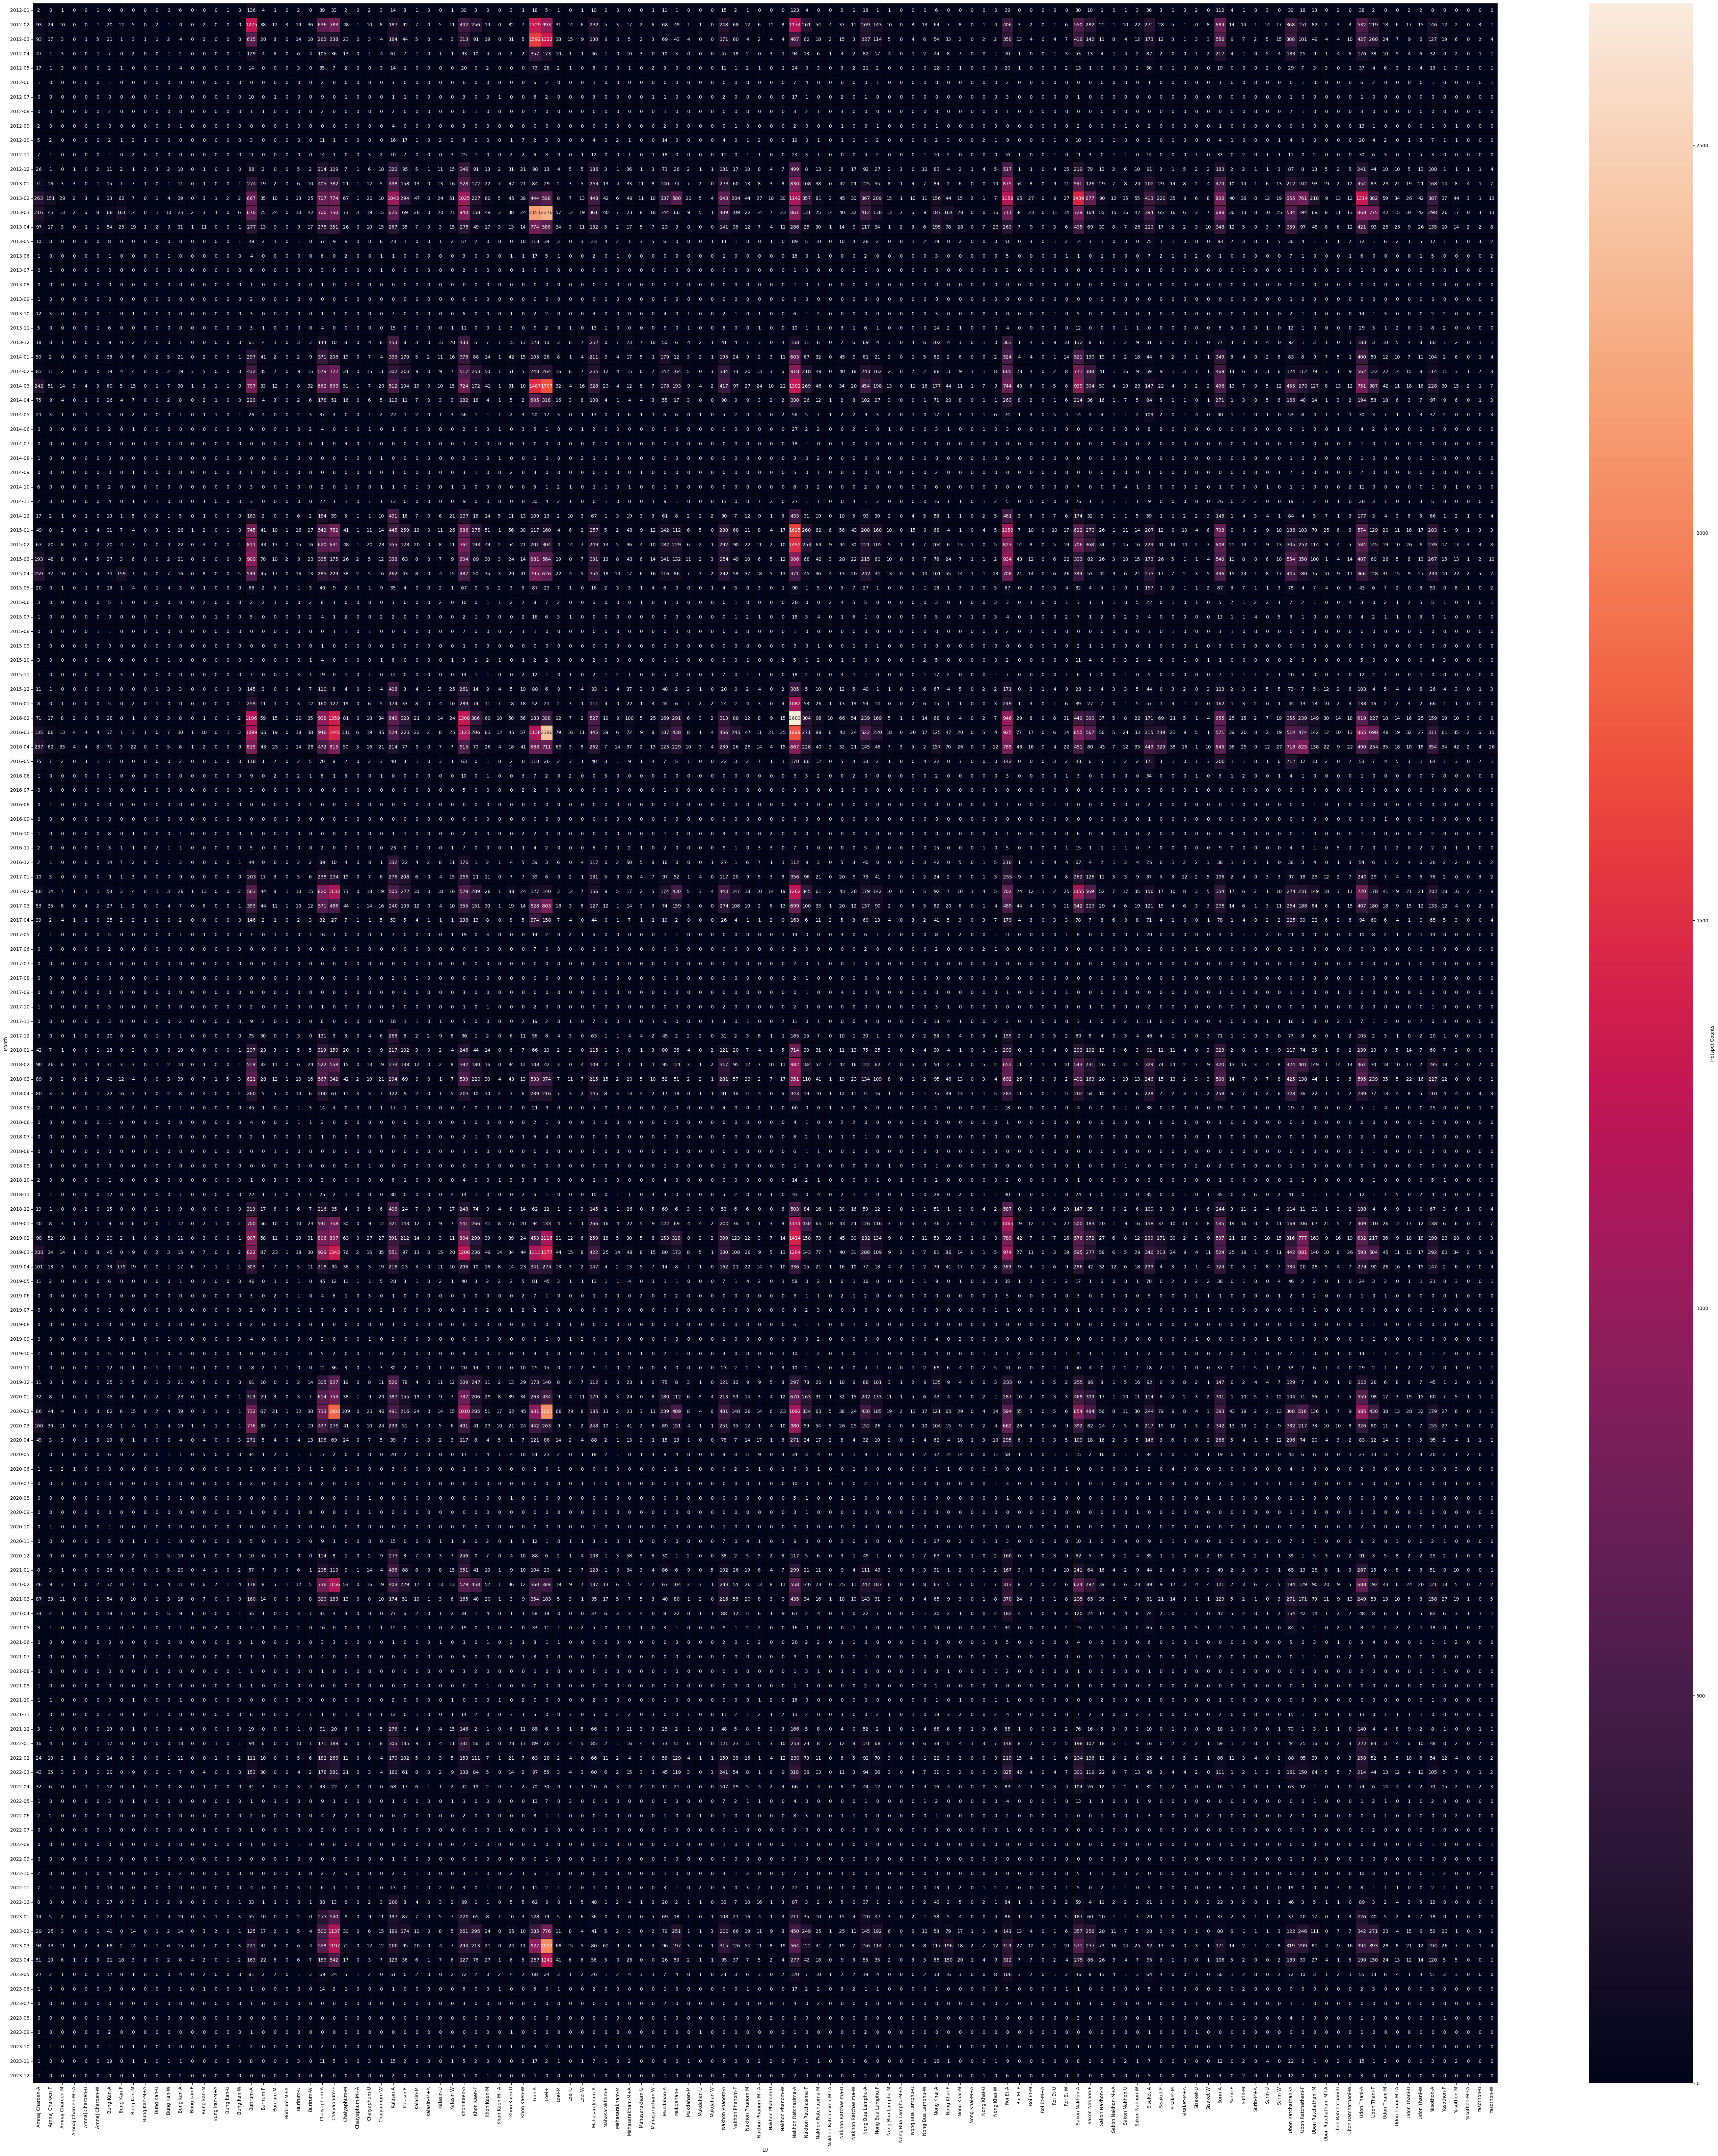

In [ ]:
#plot the heat map
plt.figure(figsize=(70,80))
sns.heatmap (heatmap_data2, annot = True, fmt = 'd', linewidths=.5, linecolor='black', cbar_kws = {'label' : 'Hotspot Counts'})